# Initialization

Run this block every time this notebook is opened

In [1]:
import os
from cryptography.fernet import Fernet


# Defining a marker file
marker_file = "marker.txt"


# If notebook has been opened before, it automatically creates a variable for usage. 
# If the file has not been opened before, then it creates a new key and also creates a variable for usage.
if not os.path.exists(marker_file):
    
    # If marker does not exist, it creates it.
    with open(marker_file, 'w') as f:
        f.write("Marker file.")
        
    # Creating key
    key = Fernet.generate_key()

    with open('fernet_key.key', 'wb') as key_file:
        key_file.write(key)
        
    # Creating variable for usage of key
    with open('fernet_key.key', 'rb') as key_file:
        key = key_file.read()
        fernet = Fernet(key)
    
else:
    # Creating variable for usage of key
    with open('fernet_key.key', 'rb') as key_file:
        key = key_file.read()
        fernet = Fernet(key)


# Functions

Defining functions for adding, deleting, updating, etc.

In [2]:
import string
import random

def add_row(website_name, username, password):
    import mysql.connector

    mydb = mysql.connector.connect(host = 'localhost', user = 'root', password = 'pass', database = 'password_manager', use_pure = True)
    
    mycursor = mydb.cursor()
    try:
        encrypted_password = fernet.encrypt(password.encode())

        # Inserting values
        sql = '''INSERT INTO username_and_password (website_name, username, password) VALUES (%s, %s, %s)'''
        val = (website_name, username, encrypted_password)
        mycursor.execute(sql, val)

        mydb.commit()

        print(mycursor.rowcount, "record inserted.")
        print()

        mydb.close()
        
    except:
        
         # Inserting values
        sql = '''INSERT INTO username_and_password (website_name, username, password) VALUES (%s, %s, %s)'''
        val = (website_name, username, password)
        mycursor.execute(sql, val)

        mydb.commit()

        print(mycursor.rowcount, "record inserted.")
        print()

        mydb.close()

        

def create_password():
    all_characters = ""
    all_characters += string.ascii_letters
    all_characters += string.digits
    all_characters += string.punctuation

    # Iterating through banned and all characters and skipping the characters that are 
    # banned while adding the allowed ones
    # to the all_allowed_characters variable
    all_allowed_characters = ""
    length = int(input('What is the upper length of the password requirement: '))
    banned_characters = input('Enter all characters that are not allowed (i.e *!?>): ')
    skip_or_not = False
    for character in all_characters:
        for banned_character in banned_characters:
            if character == banned_character:
                skip_or_not = True
                break
            else:
                skip_or_not = False
        if skip_or_not == True:
            continue
        else:
            all_allowed_characters += character

    password = ""
    for i in range(length):
        password += random.choice(all_allowed_characters)
        
    encrypted_password = fernet.encrypt(password.encode())

    return encrypted_password

    
def update_password(password, website_name):
    import mysql.connector
    
    mydb = mysql.connector.connect(host = 'localhost', user = 'root', password = 'pass', database = 'password_manager', use_pure = True)
    
    mycursor = mydb.cursor()

    try:
        encrypted_password = fernet.encrypt(password.encode())

        # Inserting values
        sql = "UPDATE username_and_password SET password = %s WHERE website_name = %s"
        val = (encrypted_password, website_name)
        mycursor.execute(sql, val)

        mydb.commit()

        print(mycursor.rowcount, "record updated.")
        print()

        mydb.close()
    except:
        # Inserting values
        sql = "UPDATE username_and_password SET password = %s WHERE website_name = %s"
        val = (password, website_name)
        mycursor.execute(sql, val)

        mydb.commit()

        print(mycursor.rowcount, "record updated.")
        print()

        mydb.close()

def update_username(website_name, new_username):
    import mysql.connector
    
    mydb = mysql.connector.connect(host = 'localhost', user = 'root', password = 'pass', database = 'password_manager', use_pure = True)
    
    mycursor = mydb.cursor()

    # Inserting values
    sql = "UPDATE username_and_password SET username = %s WHERE website_name = %s"
    val = (new_username, website_name)
    mycursor.execute(sql, val)

    mydb.commit()

    print(mycursor.rowcount, "record updated.")
    print()

    mydb.close()


def update_website_name(new_website_name, old_website_name):
    import mysql.connector
    
    mydb = mysql.connector.connect(host = 'localhost', user = 'root', password = 'pass', database = 'password_manager', use_pure = True)
    
    mycursor = mydb.cursor()

    # Inserting values
    sql = "UPDATE username_and_password SET website_name = %s WHERE website_name = %s"
    val = (new_website_name, old_website_name)
    mycursor.execute(sql, val)

    mydb.commit()

    print(mycursor.rowcount, "record updated.")
    print()

    mydb.close()
    
        

def delete_record(website_name):
    import mysql.connector
    
    mydb = mysql.connector.connect(host = 'localhost', user = 'root', password = 'pass', database = 'password_manager', use_pure = True)
    
    mycursor = mydb.cursor()

    sql = "DELETE FROM username_and_password WHERE website_name = %s"
    val = website_name
    mycursor.execute(sql, (val,))

    mydb.commit()

    print(mycursor.rowcount, "record deleted.")
    print()

    mydb.close()

def delete_all_records():
    import mysql.connector

    mydb = mysql.connector.connect(host = 'localhost', user = 'root', password = 'pass', database = 'password_manager', use_pure = True)

    mycursor = mydb.cursor()

    sql = "DELETE FROM username_and_password"
    mycursor.execute(sql)

    mydb.commit()

    print("All " + str(mycursor.rowcount) + " record(s) have been deleted.")

    mydb.close()

def export():
    import mysql.connector
    import pandas as pd
    
    mydb = mysql.connector.connect(host = 'localhost', user = 'root', password = 'pass', database = 'password_manager', use_pure = True)
    
    mycursor = mydb.cursor()

    # Inserting values
    sql = "SELECT * FROM username_and_password"
    mycursor.execute(sql)

    records = mycursor.fetchall()

    df = pd.DataFrame([[None] * 3] * mycursor.rowcount, columns = ['Website Name', 'Username', 'Password'])
    
    if len(records) == 0:
        print('There are no records')
    else:
        i = 0
        for row in records:
            encrypted_password = b'' + row[2].encode()
            decrypted_password = fernet.decrypt(encrypted_password).decode()
            df.iloc[i, 0] = row[0]
            df.iloc[i, 1] = row[1]
            df.iloc[i, 2] = decrypted_password
            i += 1

    mydb.close()
    df.to_csv('tracker.csv', index=False)

    



def view_records():
    import mysql.connector
    
    mydb = mysql.connector.connect(host = 'localhost', user = 'root', password = 'pass', database = 'password_manager', use_pure = True)
    
    mycursor = mydb.cursor()

    # Inserting values
    sql = "SELECT * FROM username_and_password"
    mycursor.execute(sql)

    records = mycursor.fetchall()
    if len(records) == 0:
        print('There are no records')
    else:
        for row in records:
            encrypted_password = b'' + row[2].encode()
            decrypted_password = fernet.decrypt(encrypted_password).decode()
            print(row[0] + ' | ' + row[1] + ' | ' + decrypted_password)

    mydb.close()

# Program

In [3]:
while True:
    user_choice = input('Would you like to (a)dd a record, (u)pdate a record, (d)elete some records, delete (all) records, (v)iew your record, (e)xport passwords, or (q)uit: ').lower()

    if user_choice == 'a':
        existing_or_new = input('Would you like to enter an (e)xisting password or would you like to (c)reate a new one: ')
        if existing_or_new == 'e':
            quantity_to_insert = int(input('How many entries would you like to add (please enter a whole number): '))
            for i in range(quantity_to_insert):
                website_name = input('Please enter the name of the website where you have created your password in: ')
                website_username = input('Please enter the username you created for the website: ')
                website_existing_password = input('Please enter the existing password: ')
                add_row(website_name, website_username, website_existing_password)
        elif existing_or_new == 'c':
            website_name = input('Please enter the name of the website where you have created your password in: ')
            website_username = input('Please enter the username you created for the website: ')
            new_password = create_password()
            add_row(website_name, website_username, new_password)
        else:
            print('Invalid choice, try again.')
            print()
    elif user_choice == 'u':
        web_user_pass = input('Would you like to change the (w)ebsite name, (u)sername, or the (p)assword: ')
        if web_user_pass == 'p':
            old_new = input('Would you like to enter a password (y)ou created or would you like the (p)rogram to create one: ')
            if old_new == 'y':
                website_name = input('Enter the name of the website whose record will be changed: ')
                new_password = input('Enter new password: ')
                update_password(new_password, website_name)
            elif old_new == 'p':
                website_name = input('Enter the name of the website whose record will be changed: ')
                new_password = create_password()
                update_password(new_password, website_name)
        elif web_user_pass == 'w':
            old_website_name = input('Enter the old website name: ')
            new_website_name = input('Enter the new website name: ')
            update_website_name(new_website_name, old_website_name)
        elif web_user_pass == 'u':
            website_name = input('Enter the website name where the username will be changed: ')
            new_username = input('Enter your new username: ')
            update_username(website_name, new_username) 
        else:
            print('Invalid choice, try again.')
            print()
    elif user_choice == 'd':
        website_name = input('Enter the website name where you want all of the information deleted')
        delete_record(website_name)
        print()
    elif user_choice == 'v':
        view_records()
        print()
    elif user_choice == 'all':
        delete_all_records()
        print()
    elif user_choice == "e":
        export()
        print()
    elif user_choice == 'q':
        break
    else:
        print('Invalid choice, try again.')
        print()
        continue
    

Would you like to (a)dd a record, (u)pdate a record, (d)elete some records, delete (all) records, (v)iew your record, (e)xport passwords, or (q)uit:  a
Would you like to enter an (e)xisting password or would you like to (c)reate a new one:  e
How many entries would you like to add (please enter a whole number):  3
Please enter the name of the website where you have created your password in:  YouTube
Please enter the username you created for the website:  username1
Please enter the existing password:  password1


1 record inserted.



Please enter the name of the website where you have created your password in:  Twitter
Please enter the username you created for the website:  username2
Please enter the existing password:  password2


1 record inserted.



Please enter the name of the website where you have created your password in:  Instagram
Please enter the username you created for the website:  username3
Please enter the existing password:  password3


1 record inserted.



Would you like to (a)dd a record, (u)pdate a record, (d)elete some records, delete (all) records, (v)iew your record, (e)xport passwords, or (q)uit:  v


YouTube | username1 | password1
Twitter | username2 | password2
Instagram | username3 | password3



Would you like to (a)dd a record, (u)pdate a record, (d)elete some records, delete (all) records, (v)iew your record, (e)xport passwords, or (q)uit:  u
Would you like to change the (w)ebsite name, (u)sername, or the (p)assword:  w
Enter the old website name:  Twitter
Enter the new website name:  X


1 record updated.



Would you like to (a)dd a record, (u)pdate a record, (d)elete some records, delete (all) records, (v)iew your record, (e)xport passwords, or (q)uit:  v


YouTube | username1 | password1
X | username2 | password2
Instagram | username3 | password3



Would you like to (a)dd a record, (u)pdate a record, (d)elete some records, delete (all) records, (v)iew your record, (e)xport passwords, or (q)uit:  d
Enter the website name where you want all of the information deleted Instagram


1 record deleted.




Would you like to (a)dd a record, (u)pdate a record, (d)elete some records, delete (all) records, (v)iew your record, (e)xport passwords, or (q)uit:  v


YouTube | username1 | password1
X | username2 | password2



Would you like to (a)dd a record, (u)pdate a record, (d)elete some records, delete (all) records, (v)iew your record, (e)xport passwords, or (q)uit:  e


Would you like to (a)dd a record, (u)pdate a record, (d)elete some records, delete (all) records, (v)iew your record, (e)xport passwords, or (q)uit:  q


## SQL Database

Adding 3 rows to the database

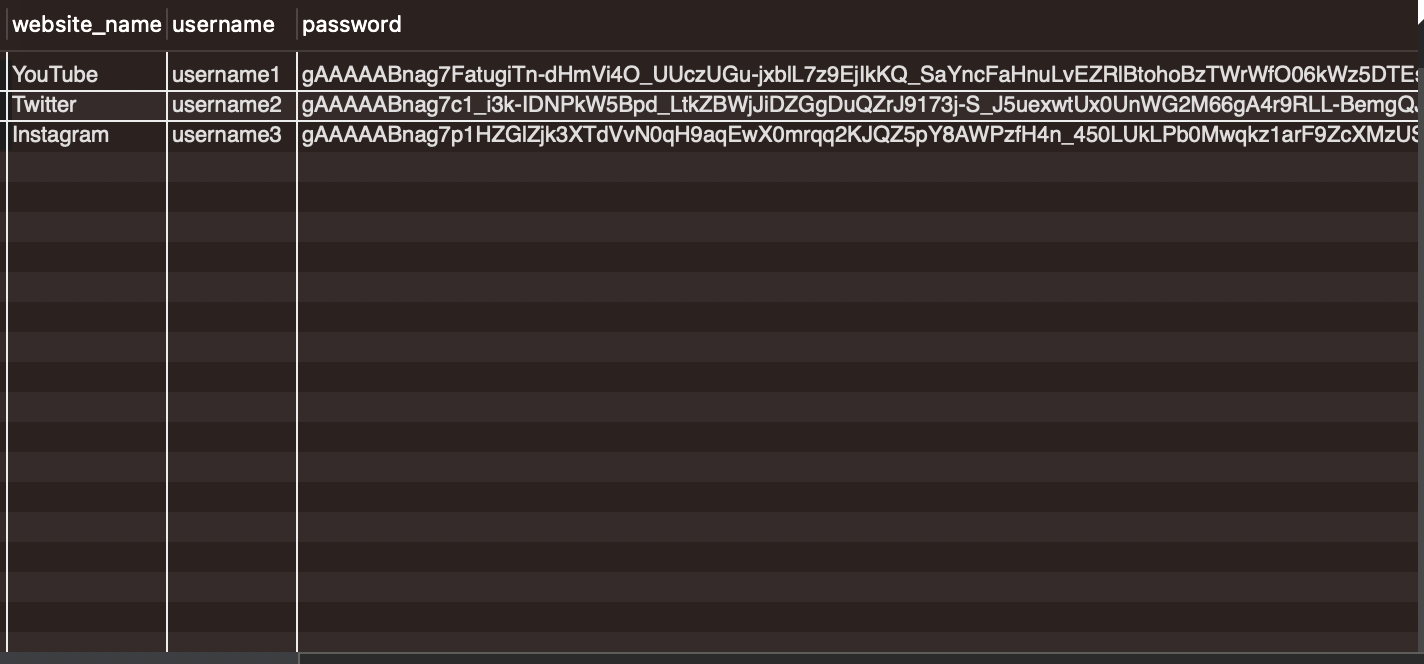

Updating "Twitter" to "X"

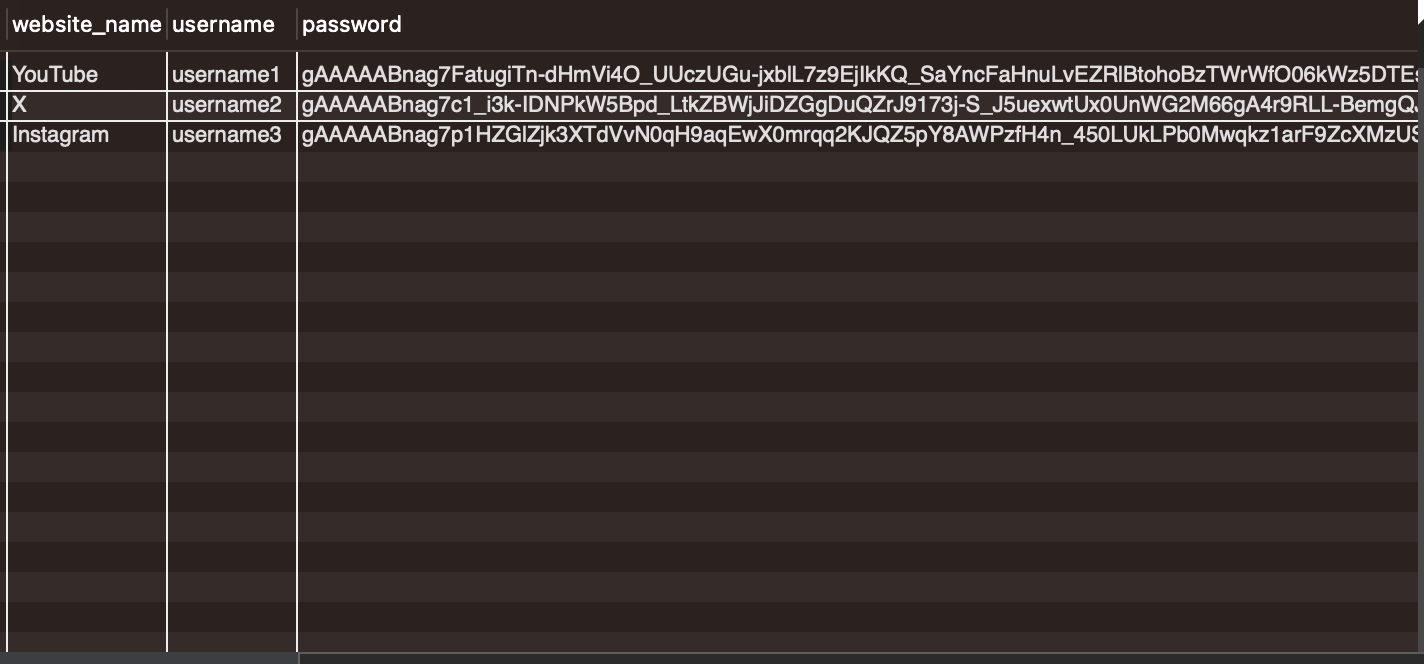

Deleting one entry

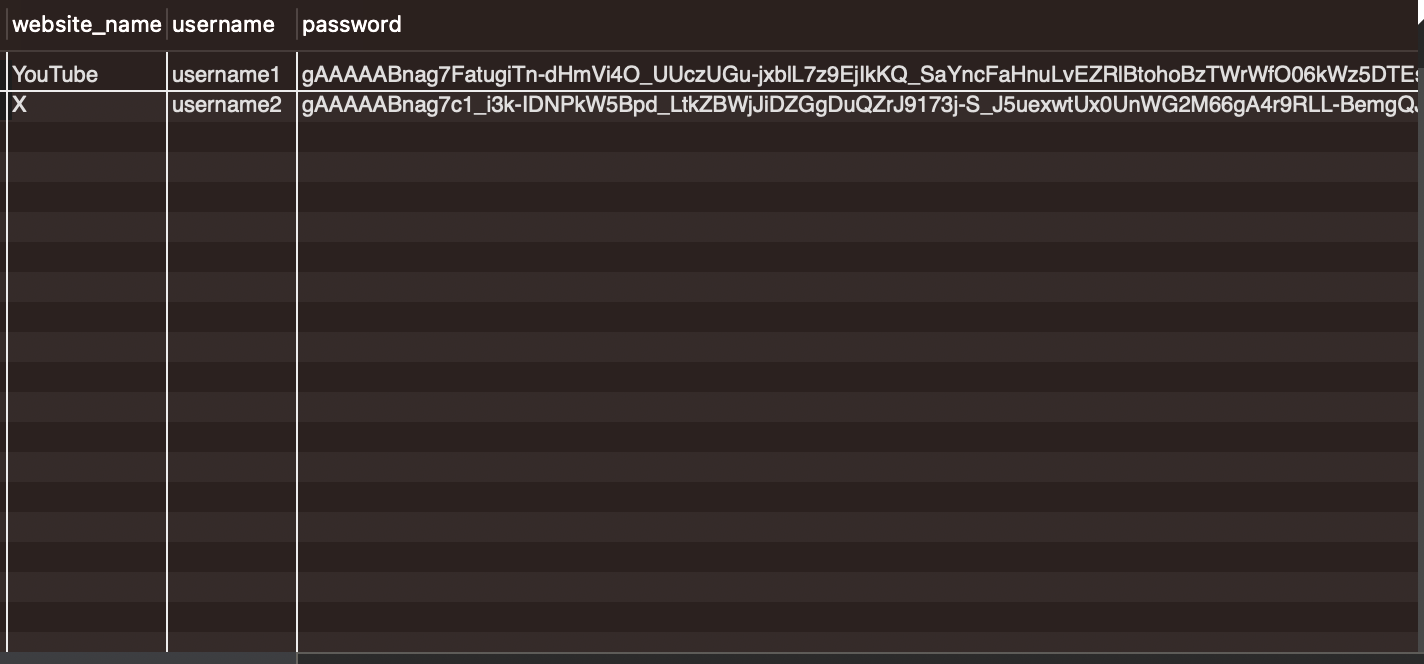

Exporting the final table as a csv and viewing it

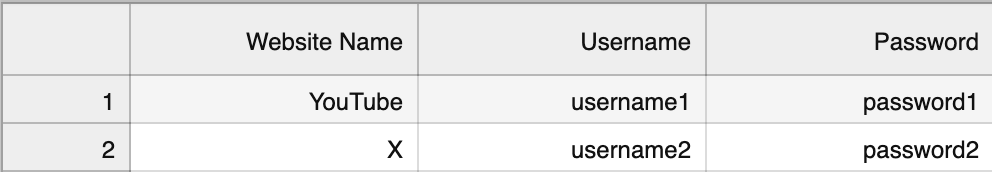